## Q2 
## Crime dataset
### KMeans clustering and elbow curve on crime dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
crime=pd.read_csv("crime_data.csv.xls")

In [11]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [12]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [28]:
cols = ['Murder', 'Assault', 'UrbanPop', 'Rape']

### initial plots to understand data

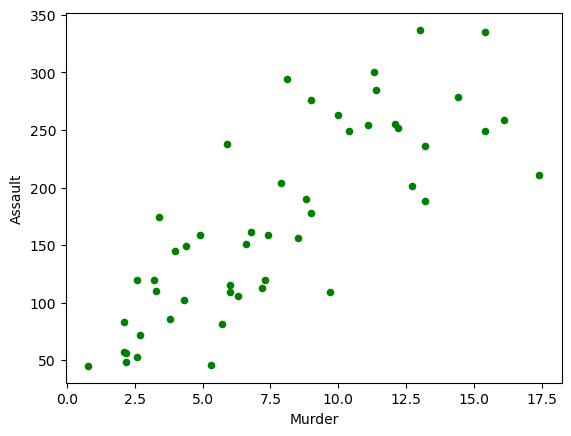

In [20]:
#murder and assault
plt.scatter(crime['Murder'], crime['Assault'],s=20,color='green')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

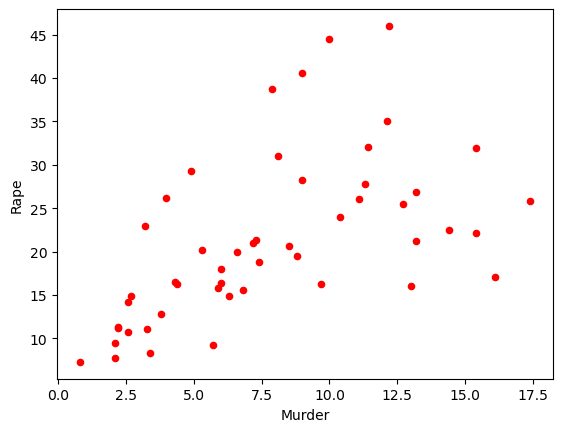

In [21]:
#murder and rape
plt.scatter(crime['Murder'], crime['Rape'],s=20,color='red')
plt.xlabel('Murder')
plt.ylabel('Rape')
plt.show()

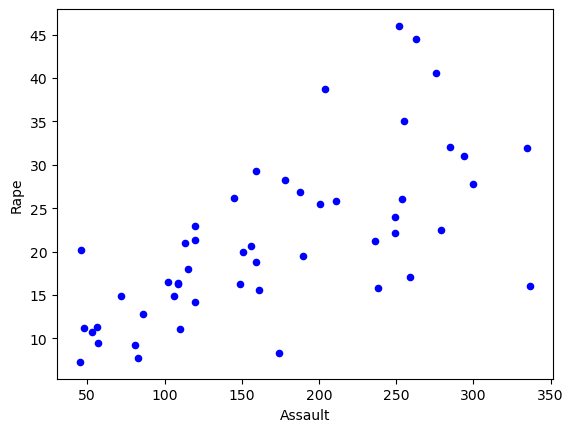

In [22]:
#RApe and assault
plt.scatter(crime['Assault'], crime['Rape'],s=20,color='blue')
plt.xlabel('Assault')
plt.ylabel('Rape')
plt.show()

In [29]:
#pre process the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(crime[cols])

## KMeans clustering

In [31]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(df_scaled)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
crime['cluster'] = y_predicted
print(crime.head())

   Unnamed: 0  Murder  Assault  UrbanPop  Rape  cluster
0     Alabama    13.2      236        58  21.2        1
1      Alaska    10.0      263        48  44.5        1
2     Arizona     8.1      294        80  31.0        1
3    Arkansas     8.8      190        50  19.5        0
4  California     9.0      276        91  40.6        1


In [35]:
#show cluster centers
print("Cluster Centers (scaled):")
print(km.cluster_centers_)

Cluster Centers (scaled):
[[0.30368533 0.33178888 0.68594217 0.29776562]
 [0.68463855 0.72003425 0.61694915 0.56498708]
 [0.1686747  0.11485774 0.34028683 0.12601868]]


In [42]:
# Inverse transform the cluster centers back to the original scale
centroids_original = scaler.inverse_transform(km.cluster_centers_)
print("Cluster Centers (original scale):")
print(centroids_original)

Cluster Centers (original scale):
[[  5.84117647 141.88235294  72.47058824  18.82352941]
 [ 12.165      255.25        68.4         29.165     ]
 [  3.6         78.53846154  52.07692308  12.17692308]]


In [36]:
# Creating dataframes for each cluster
df1 = crime[crime.cluster == 0]
df2 = crime[crime.cluster == 1]
df3 = crime[crime.cluster == 2]

## Plotting the clusters

### Murder vs Assault

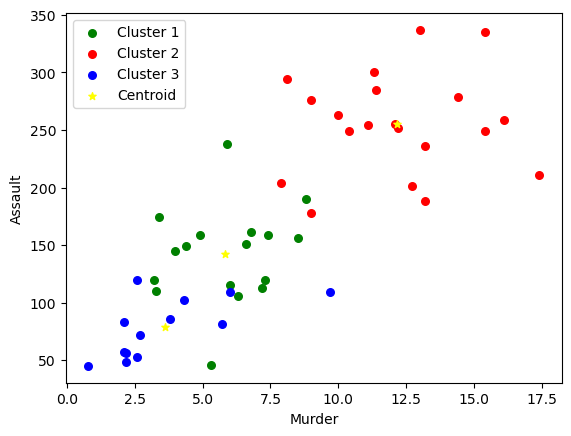

In [50]:
plt.scatter(df1['Murder'], df1['Assault'], color='green', label='Cluster 1',s=30)
plt.scatter(df2['Murder'], df2['Assault'], color='red', label='Cluster 2',s=30)
plt.scatter(df3['Murder'], df3['Assault'], color='blue', label='Cluster 3',s=30)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], color='yellow', marker='*', s=30, label='Centroid')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()

### Murder and Rape

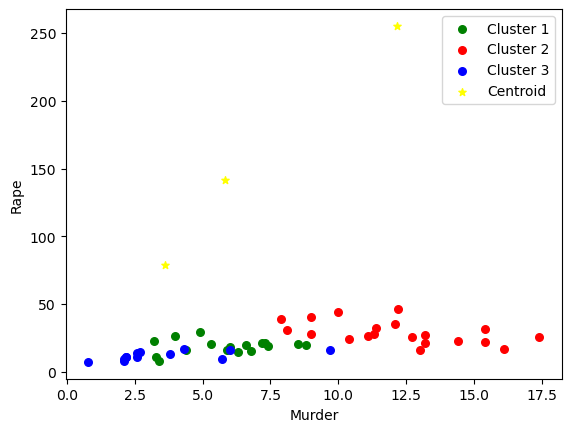

In [59]:
plt.scatter(df1['Murder'], df1['Rape'], color='green', label='Cluster 1',s=30)
plt.scatter(df2['Murder'], df2['Rape'], color='red', label='Cluster 2',s=30)
plt.scatter(df3['Murder'], df3['Rape'], color='blue', label='Cluster 3',s=30)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], color='yellow', marker='*', s=30, label='Centroid')
plt.xlabel('Murder')
plt.ylabel('Rape')
plt.legend()
plt.show()

### Rape and assault

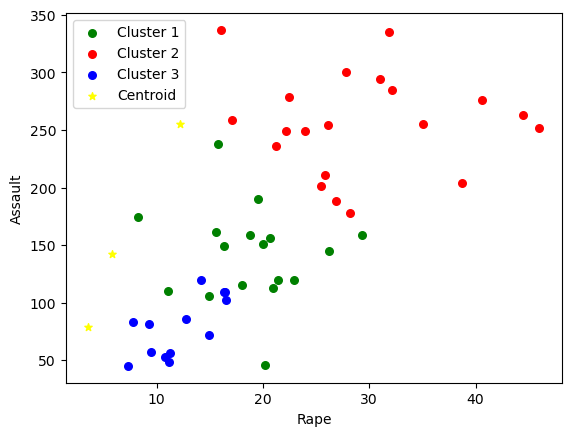

In [60]:
plt.scatter(df1['Rape'], df1['Assault'], color='green', label='Cluster 1',s=30)
plt.scatter(df2['Rape'], df2['Assault'], color='red', label='Cluster 2',s=30)
plt.scatter(df3['Rape'], df3['Assault'], color='blue', label='Cluster 3',s=30)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], color='yellow', marker='*', s=30, label='Centroid')
plt.xlabel('Rape')
plt.ylabel('Assault')
plt.legend()
plt.show()

## Elbow curve

In [61]:
#function to normalise column data
def normalization(column):
    return (column - column.min()) / (column.max() - column.min())
df_norm=normalization(crime.iloc[:,1:])

In [62]:
df_norm.describe()

,Murder,Assault,UrbanPop,Rape,cluster
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000,0.460000
std,0.262380,0.285403,0.245335,0.242025,0.389138
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904,0.000000
50%,0.388554,0.390411,0.576271,0.330749,0.500000
75%,0.629518,0.698630,0.775424,0.487726,0.875000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
df_norm = scaler.fit_transform(crime[cols])

In [65]:
#Find number of clusters
TWSS = []
k = list(range(2, 8))  # Cluster range to test
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)  # Total within-cluster sum of squares (inertia)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

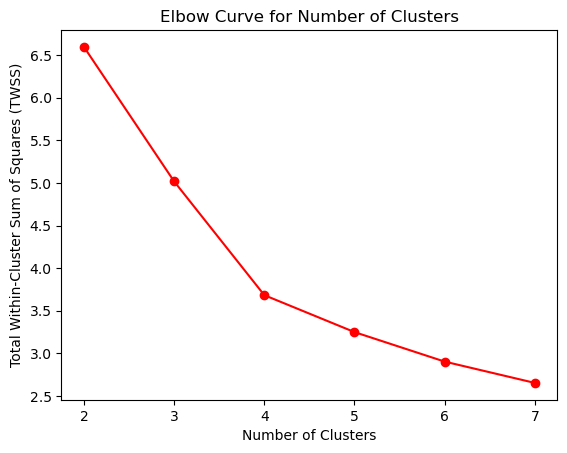

In [66]:
# Plotting the Elbow Curve
plt.plot(k, TWSS, 'ro-')
plt.xlabel("Number of Clusters")
plt.ylabel("Total Within-Cluster Sum of Squares (TWSS)")
plt.title("Elbow Curve for Number of Clusters")
plt.show()